In [214]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure, morphology
from skimage.measure import regionprops
import math

In [215]:
from signature_detect.loader import Loader
from signature_detect.extractor import Extractor
from signature_detect.cropper import Cropper
from signature_detect.judger import Judger

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [216]:
def show_image(img):
    fig, ax = plt.subplots(figsize=(20, 14))
    ax.imshow(img)
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

# Image

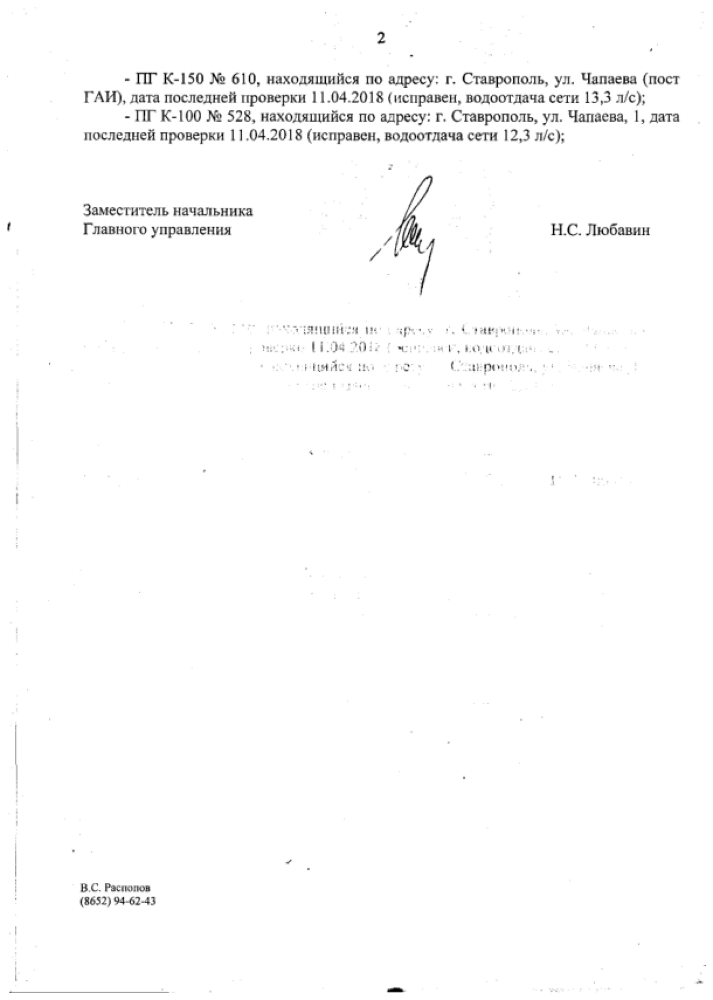

In [217]:
path = 'test_sign3.png'
image = cv2.imread('test_sign3.png')
show_image(image)

## Loader

The loader reads the file and creates a mask. 

The mask is a numpy array. The bright parts are set to 255, the rest is set to 0.

In [218]:
loader = Loader()
print(loader)


Loader
low_threshold = (0, 0, 250)
high_threshold = (255, 255, 255)



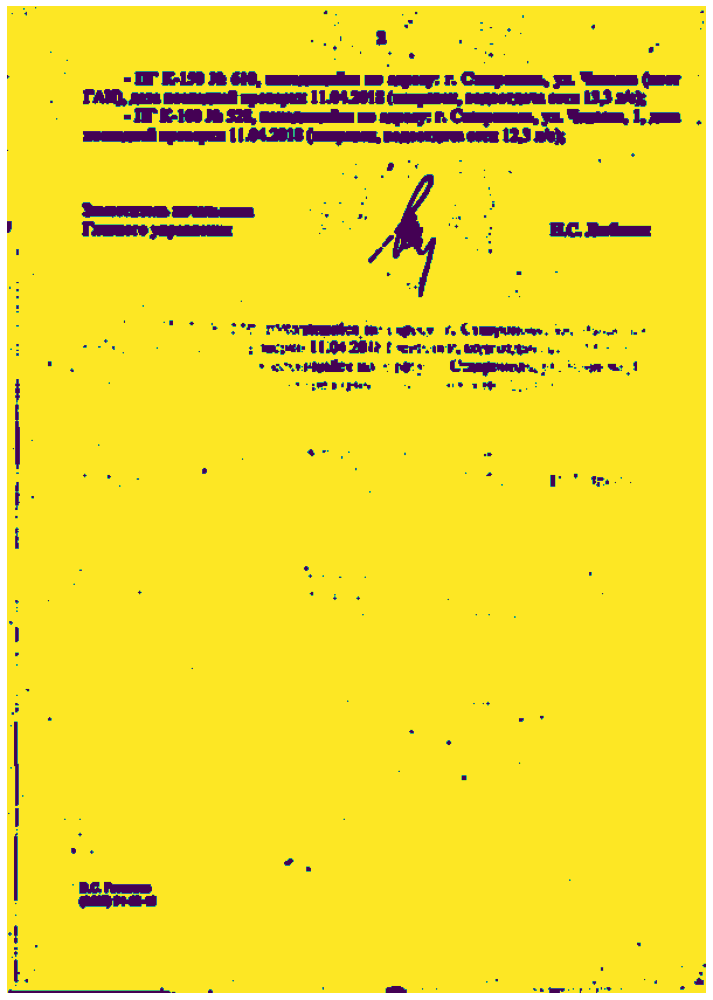

In [219]:
mask = loader.get_masks(image)
show_image(mask)
# plt.imsave('./data/output/mask.jpeg', mask)

## Extractor

The extractor 

1. generates the regions from the mask.
2. removes the small and the big region because the signature is neither too big nor too small.

In [220]:
extractor = Extractor(outlier_weight=3, outlier_bias=100, amplfier=15, min_area_size=10)
print(extractor)


Extractor
outlier_weight = 3
outlier_bias = 100
> small_outlier_size = outlier_weight * average_region_size + outlier_bias
amplfier = 15
> large_outlier_size = amplfier * small_outlier_size
min_area_size = 10 (pixels)
> min_area_size is used to calculate average_region_size.



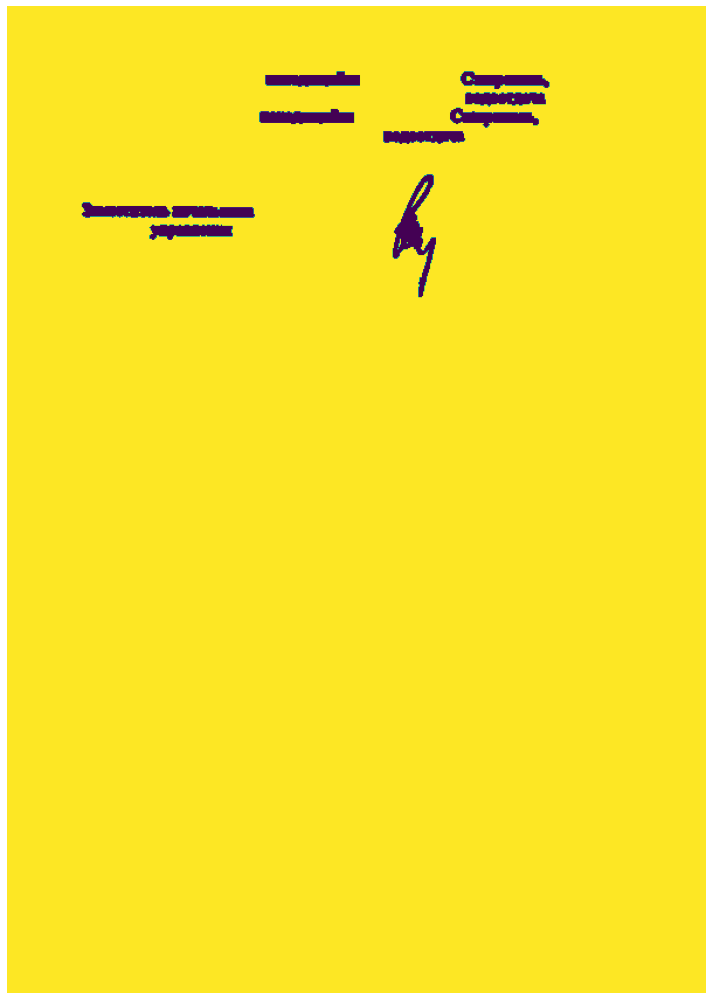

In [221]:
labeled_mask = extractor.extract(mask)
show_image(labeled_mask)
#plt.imsave('labeled_mask.png', labeled_mask)

## Cropper

The cropper finds the **contours** of regions in the **labeled masks** and crop them.

In [222]:
cropper = Cropper(min_region_size=2000, border_ratio=0.1)
print(cropper)


Cropper
min_region_size = 2000
border_ratio = 0.1



In [223]:
results = cropper.run(labeled_mask)

In [224]:
len(results)

1

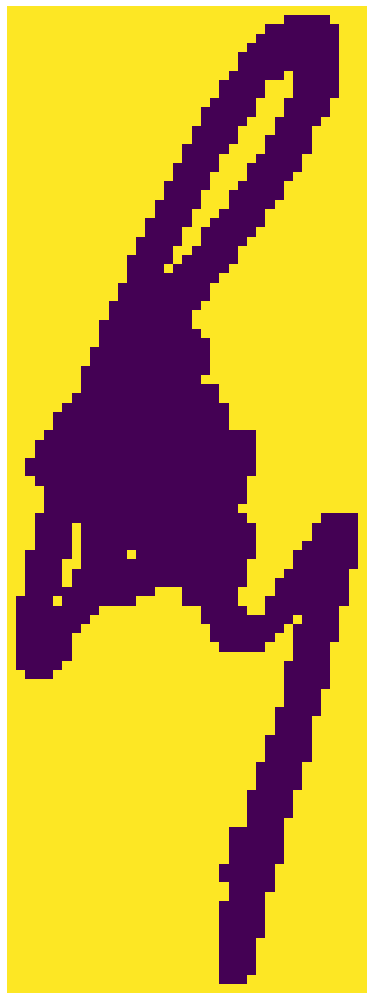

In [225]:
signature = results[0]["cropped_mask"]
show_image(signature)
# plt.imsave('./data/output/signature.jpeg', signature)

## Judger

The judger reads the cropped mask and identifies if it's a signature or not.

In [226]:
judger = Judger()
print(judger)


Judger
size_ratio = [1, 4]
pixel_ratio = [0.01, 1]



In [227]:
result = judger.judge(signature)
result

True